In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df=titanic.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'],axis='columns')

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
df['Sex'].replace({'male':0,'female':1},inplace=True)


In [8]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
886,0,2,0,27.0,13.0000
887,1,1,1,19.0,30.0000
888,0,3,1,28.0,23.4500
889,1,1,0,26.0,30.0000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [10]:
df.to_csv('titanic_cleaned.csv',index=False)

In [29]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [30]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [32]:
model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [33]:
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.7653631284916201


In [34]:
model.score(X_test, y_test)

0.7653631284916201

In [40]:
model1 = DecisionTreeClassifier(criterion="entropy",max_depth=5,max_features=6)

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

model1.score(X_test,y_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.7932960893854749


[Text(0.46875, 0.9166666666666666, 'x[1] <= 0.5\nentropy = 0.956\nsamples = 712\nvalue = [443, 269]'),
 Text(0.19375, 0.75, 'x[2] <= 13.0\nentropy = 0.688\nsamples = 463\nvalue = [378, 85]'),
 Text(0.075, 0.5833333333333334, 'x[0] <= 2.5\nentropy = 0.938\nsamples = 31\nvalue = [11, 20]'),
 Text(0.05, 0.4166666666666667, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.1, 0.4166666666666667, 'x[3] <= 20.825\nentropy = 0.993\nsamples = 20\nvalue = [11, 9]'),
 Text(0.05, 0.25, 'x[2] <= 10.0\nentropy = 0.503\nsamples = 9\nvalue = [1, 8]'),
 Text(0.025, 0.08333333333333333, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.075, 0.08333333333333333, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.15, 0.25, 'x[2] <= 3.5\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Text(0.125, 0.08333333333333333, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.175, 0.08333333333333333, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.3125, 0.5833333333333334, 'x[0] <=

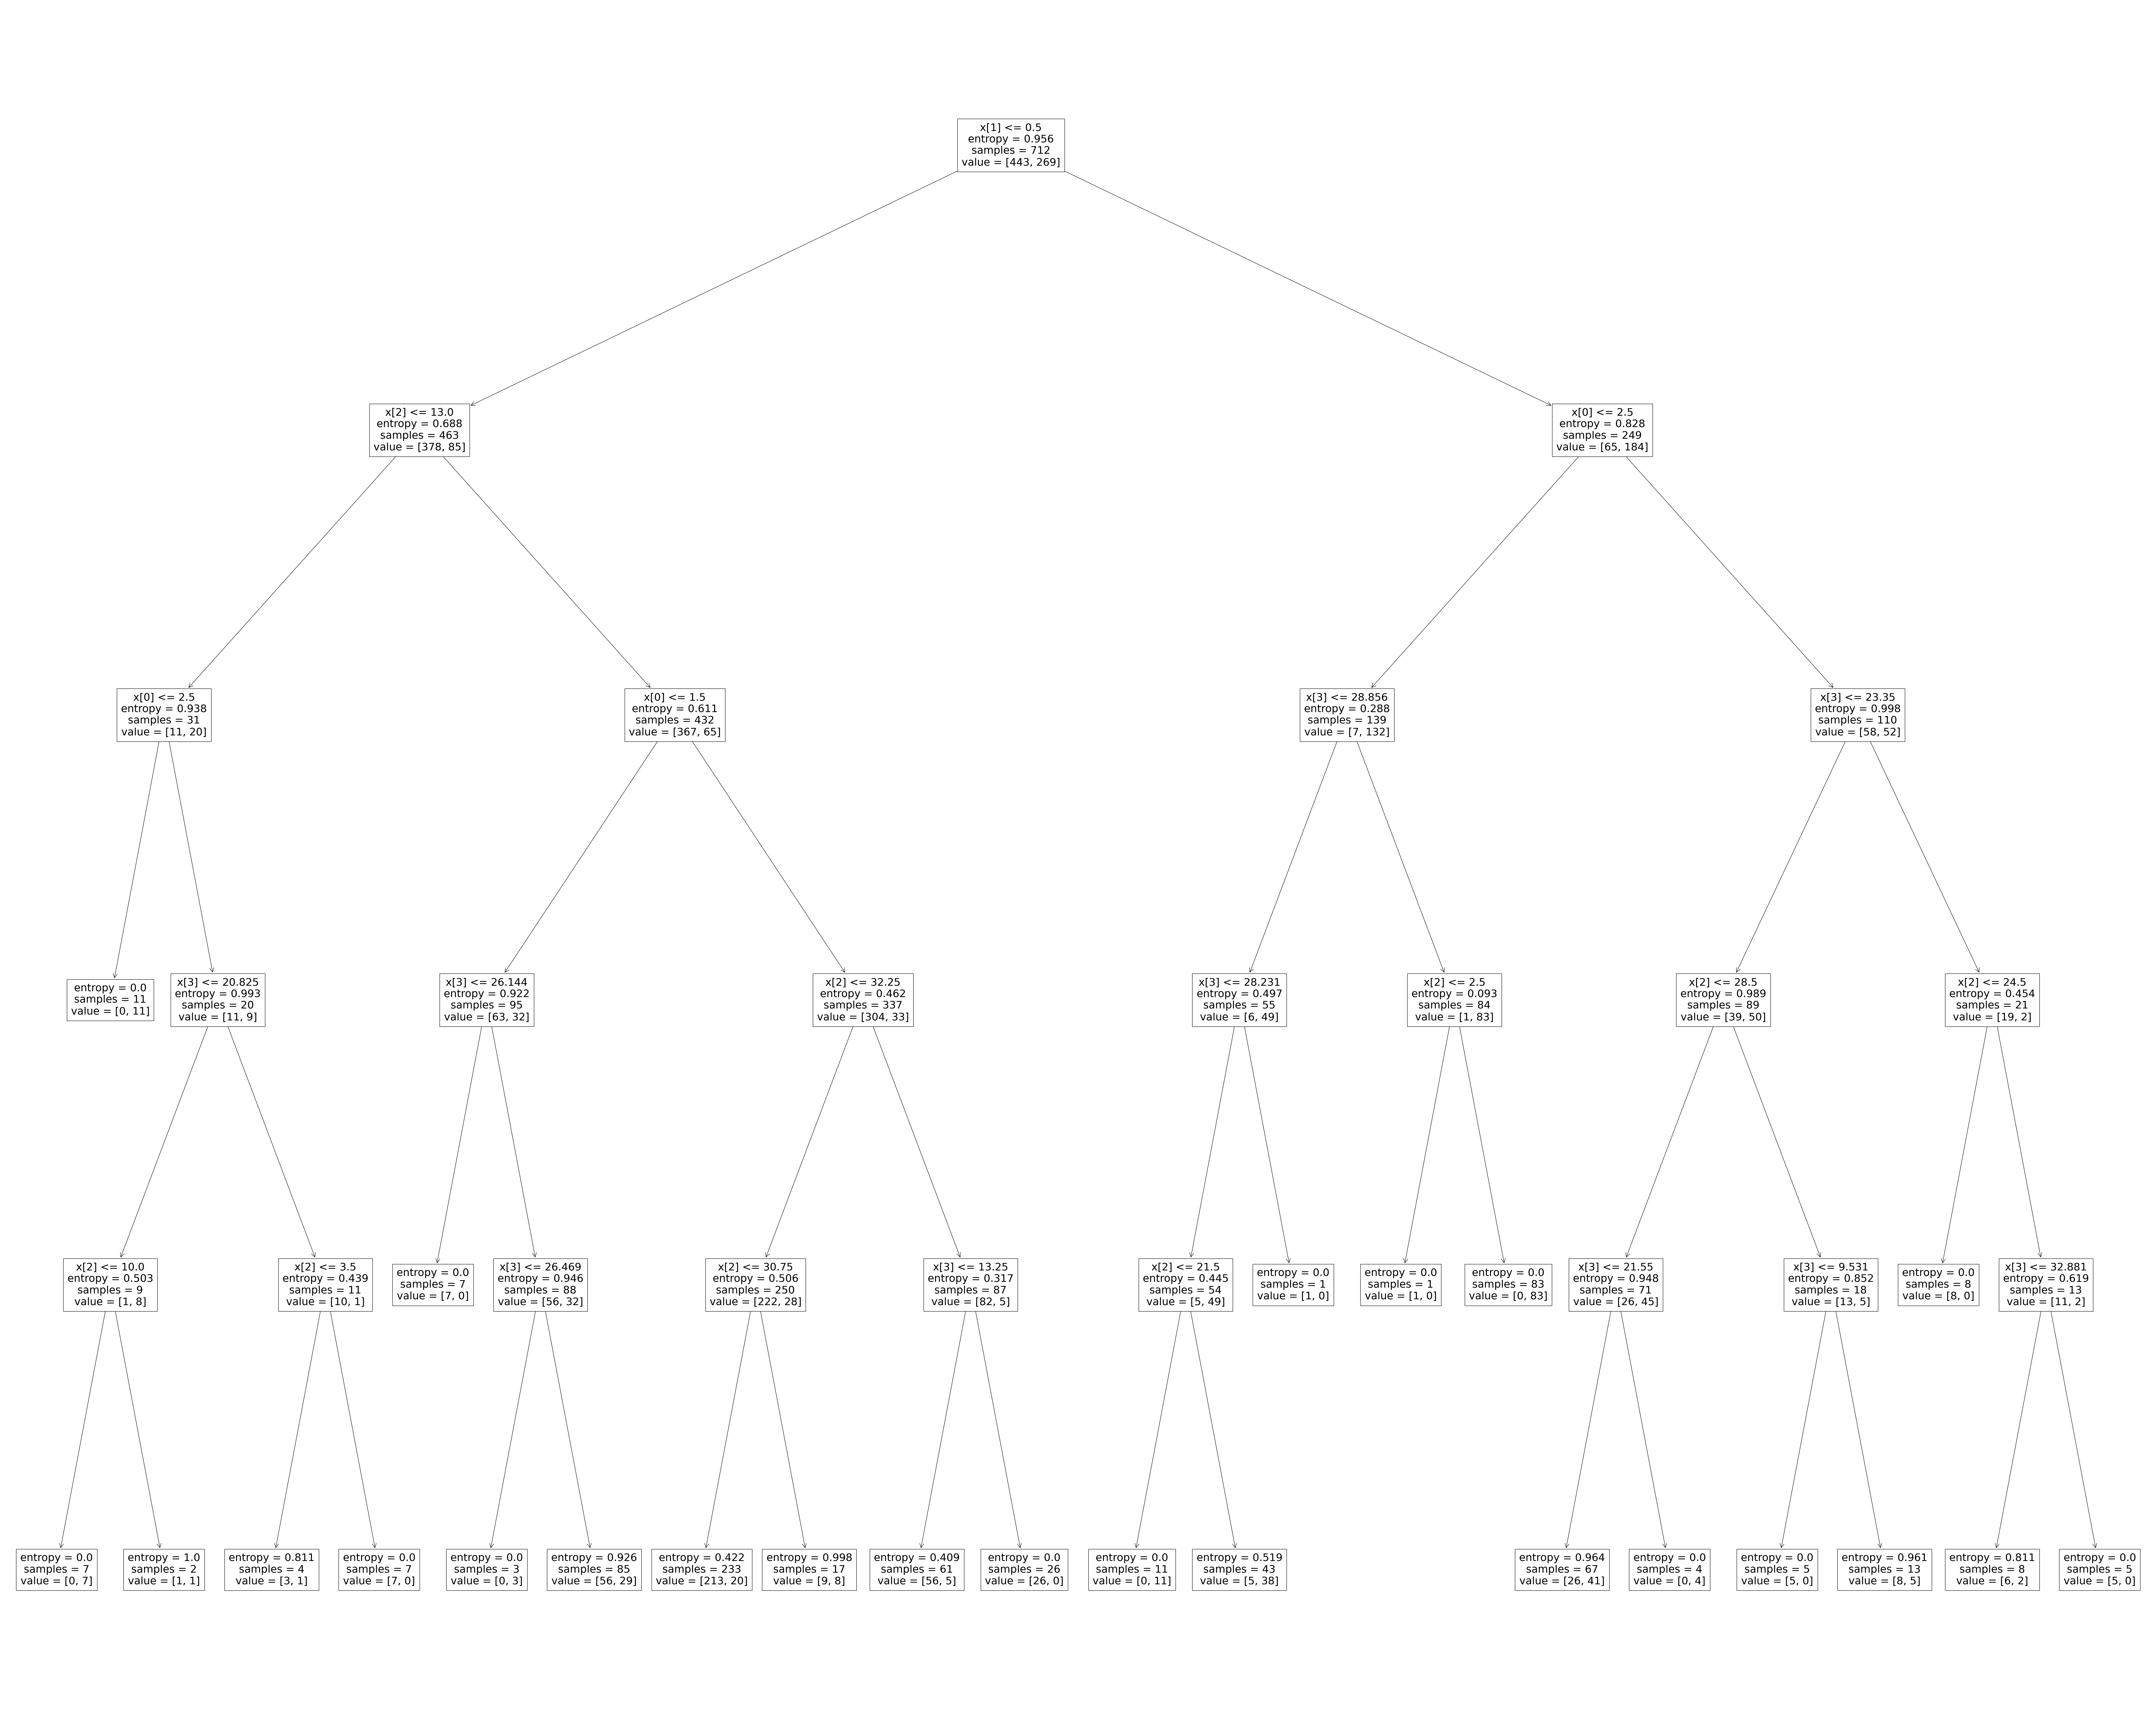

In [41]:
pl = plt.figure(figsize=(100,80))
tree.plot_tree(model1)

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV


In [19]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [20]:
rf.score(X_test, y_test)

0.8100558659217877

In [21]:
y_pred = rf.predict(X_test)
acc = precision_score(y_test ,y_pred)
print('Accuracy : ',acc)

Accuracy :  0.8545454545454545


In [22]:
rf1 = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}



from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf1,
                           param_grid=params,
                           cv = 4,
                           scoring="accuracy")


# grid_search = GridSearchCV(estimator=clf, 
#                            param_grid=param_grid, 
#                            cv=5, 
#                            scoring='accuracy')
# grid_search.fit(X_train, y_train)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy')

In [27]:
grid_search.best_score_

0.8300561797752809